# Using LSTMS to predict Stock Prices

In [111]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import json

Let's first read the data. We are going to use pandas, and read the csv to make a data frame.

In [112]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


Print out the basic information on our data frame.

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In this example, we want to compare the strength of the LSTMS using different features. The different features in this example are going to be the different columns of the dataframe (close, open, high, etc.). But frst we need to convert the close column into a float type.

In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') #I basically did nothing last time
data = data.dropna()

We are going to make training data set for each of the features.

In [138]:
#trainData = data.iloc[:,4:5].values

trainDataOpen = data.iloc[:,1:2].values
trainDataHigh = data.iloc[:,2:3].values
trainDataLow = data.iloc[:,3:4].values
trainDataClose = data.iloc[:,4:5].values


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


Then we will apply a MinMax scaler to all of features.

In [139]:
# sc = MinMaxScaler(feature_range=(0,1))
# trainData = sc.fit_transform(trainData)
# trainData.shape

sc = MinMaxScaler(feature_range=(0,1))

trainDataOpen = sc.fit_transform(trainDataOpen)
trainDataHigh = sc.fit_transform(trainDataHigh)
trainDataLow = sc.fit_transform(trainDataLow)
trainDataClose = sc.fit_transform(trainDataClose)



We will then split the training data, using 60 data points as a timestep. Remember we must do this for all the features indiviually (is there a faster way?)

In [141]:
# X_train = []
# y_train = []

# for i in range (60,1149): #60 : timestep // 1149 : length of the data
#     X_train.append(trainData[i-60:i,0]) 
#     y_train.append(trainData[i,0])

# X_train,y_train = np.array(X_train),np.array(y_train)
# print(X_train.shape)
# print(y_train)

X_train_Open = []
y_train_Open = []
X_train_Close = []
y_train_Close = []
X_train_High = []
y_train_High = []
X_train_Low = []
y_train_Low = []

for i in range(60, 1149):  # 60 : timestep // 1149 : length of the data
    X_train_Open.append(trainDataOpen[i-60:i, 0])
    y_train_Open.append(trainDataOpen[i, 0])
    
    X_train_Close.append(trainDataClose[i-60:i, 0])
    y_train_Close.append(trainDataClose[i, 0])
    
    X_train_High.append(trainDataHigh[i-60:i, 0])
    y_train_High.append(trainDataHigh[i, 0])
    
    X_train_Low.append(trainDataLow[i-60:i, 0])
    y_train_Low.append(trainDataLow[i, 0])

# Convert lists to numpy arrays
X_train_Open, y_train_Open = np.array(X_train_Open), np.array(y_train_Open)
X_train_Close, y_train_Close = np.array(X_train_Close), np.array(y_train_Close)
X_train_High, y_train_High = np.array(X_train_High), np.array(y_train_High)
X_train_Low, y_train_Low = np.array(X_train_Low), np.array(y_train_Low)

Doing the necessary reshaping. The batch size indicates how many features are included in that data set. In our case it is one.

In [142]:
# X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
# X_train.shape

X_train_Open = np.reshape(X_train_Open,(X_train_Open.shape[0],X_train_Open.shape[1],1)) #adding the batch_size axis
X_train_Close = np.reshape(X_train_Close,(X_train_Close.shape[0],X_train_Close.shape[1],1)) #adding the batch_size axis
X_train_High = np.reshape(X_train_High,(X_train_High.shape[0],X_train_High.shape[1],1)) #adding the batch_size axis
X_train_Low = np.reshape(X_train_Low,(X_train_Low.shape[0],X_train_Low.shape[1],1)) #adding the batch_size axis


Single feature LSTM Model that we will apply to each feature individually!

In [ ]:
# model = Sequential()

# model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train_Open.shape[1],1)))
# model.add(Dropout(0.2))

# model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=100, return_sequences = False))
# model.add(Dropout(0.2))

# model.add(Dense(units =1))
# model.compile(optimizer='adam',loss="mean_squared_error")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


I created a function to create and train the model.

In [244]:
def create_and_train_model(X_train, y_train, epochs=20, batch_size=32, features = 1):
    # Define the model architecture
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], features)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=features))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    return model, history

In [155]:
# Define the datasets
datasets = {
    "Open": (X_train_Open, y_train_Open),
    "Close": (X_train_Close, y_train_Close),
    "High": (X_train_High, y_train_High),
    "Low": (X_train_Low, y_train_Low),
}

# Store models and histories
models = {}
hists = {}

for key, (X_train, y_train) in datasets.items():
    print(f"Training model for {key}...")
    model, history = create_and_train_model(X_train, y_train)
    models[key] = model
    hists[key] = history

Training model for Open...
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 - 7s - 213ms/step - loss: 0.0281
Epoch 2/20
35/35 - 4s - 123ms/step - loss: 0.0047
Epoch 3/20
35/35 - 5s - 130ms/step - loss: 0.0046
Epoch 4/20
35/35 - 4s - 124ms/step - loss: 0.0037
Epoch 5/20
35/35 - 4s - 125ms/step - loss: 0.0043
Epoch 6/20
35/35 - 4s - 126ms/step - loss: 0.0045
Epoch 7/20
35/35 - 4s - 125ms/step - loss: 0.0038
Epoch 8/20
35/35 - 4s - 124ms/step - loss: 0.0036
Epoch 9/20
35/35 - 4s - 126ms/step - loss: 0.0035
Epoch 10/20
35/35 - 5s - 143ms/step - loss: 0.0043
Epoch 11/20
35/35 - 4s - 126ms/step - loss: 0.0037
Epoch 12/20
35/35 - 4s - 125ms/step - loss: 0.0033
Epoch 13/20
35/35 - 4s - 126ms/step - loss: 0.0037
Epoch 14/20
35/35 - 4s - 125ms/step - loss: 0.0044
Epoch 15/20
35/35 - 4s - 125ms/step - loss: 0.0049
Epoch 16/20
35/35 - 5s - 137ms/step - loss: 0.0031
Epoch 17/20
35/35 - 5s - 133ms/step - loss: 0.0033
Epoch 18/20
35/35 - 5s - 132ms/step - loss: 0.0073
Epoch 19/20
35/35 - 4s - 128ms/step - loss: 0.0031
Epoch 20/20
35/35 - 5s - 130ms/step - loss: 0.0056


In [ ]:
# hists = {}

# histOpen = model.fit(X_train_Open, y_train_Open, epochs = 20, batch_size = 32, verbose=2)
# histClose = model.fit(X_train_Close, y_train_Close, epochs = 20, batch_size = 32, verbose=2)
# histHigh = model.fit(X_train_High, y_train_High, epochs = 20, batch_size = 32, verbose=2)
# histLow = model.fit(X_train_Low, y_train_Low, epochs = 20, batch_size = 32, verbose=2)

# hists["Open"] = histOpen
# hists["Close"] = histClose
# hists["High"] = histHigh
# hists["Low"] = histLow

Epoch 1/20
35/35 - 5s - 146ms/step - loss: 0.0014
Epoch 2/20
35/35 - 5s - 140ms/step - loss: 0.0012
Epoch 3/20
35/35 - 5s - 139ms/step - loss: 0.0013
Epoch 4/20
35/35 - 5s - 142ms/step - loss: 0.0011
Epoch 5/20
35/35 - 5s - 133ms/step - loss: 0.0014
Epoch 6/20
35/35 - 4s - 126ms/step - loss: 9.3657e-04
Epoch 7/20
35/35 - 5s - 133ms/step - loss: 0.0011
Epoch 8/20
35/35 - 4s - 127ms/step - loss: 9.7784e-04
Epoch 9/20
35/35 - 5s - 129ms/step - loss: 0.0012
Epoch 10/20
35/35 - 5s - 142ms/step - loss: 0.0010
Epoch 11/20
35/35 - 5s - 133ms/step - loss: 0.0014
Epoch 12/20
35/35 - 4s - 126ms/step - loss: 0.0012
Epoch 13/20
35/35 - 4s - 127ms/step - loss: 0.0010
Epoch 14/20
35/35 - 4s - 126ms/step - loss: 9.2132e-04
Epoch 15/20
35/35 - 4s - 126ms/step - loss: 9.4265e-04
Epoch 16/20
35/35 - 4s - 125ms/step - loss: 8.8735e-04
Epoch 17/20
35/35 - 5s - 130ms/step - loss: 9.2972e-04
Epoch 18/20
35/35 - 5s - 143ms/step - loss: 8.6664e-04
Epoch 19/20
35/35 - 5s - 137ms/step - loss: 0.0012
Epoch 20/20


Now we can plot the loss function as a graph and see how well each one performed.

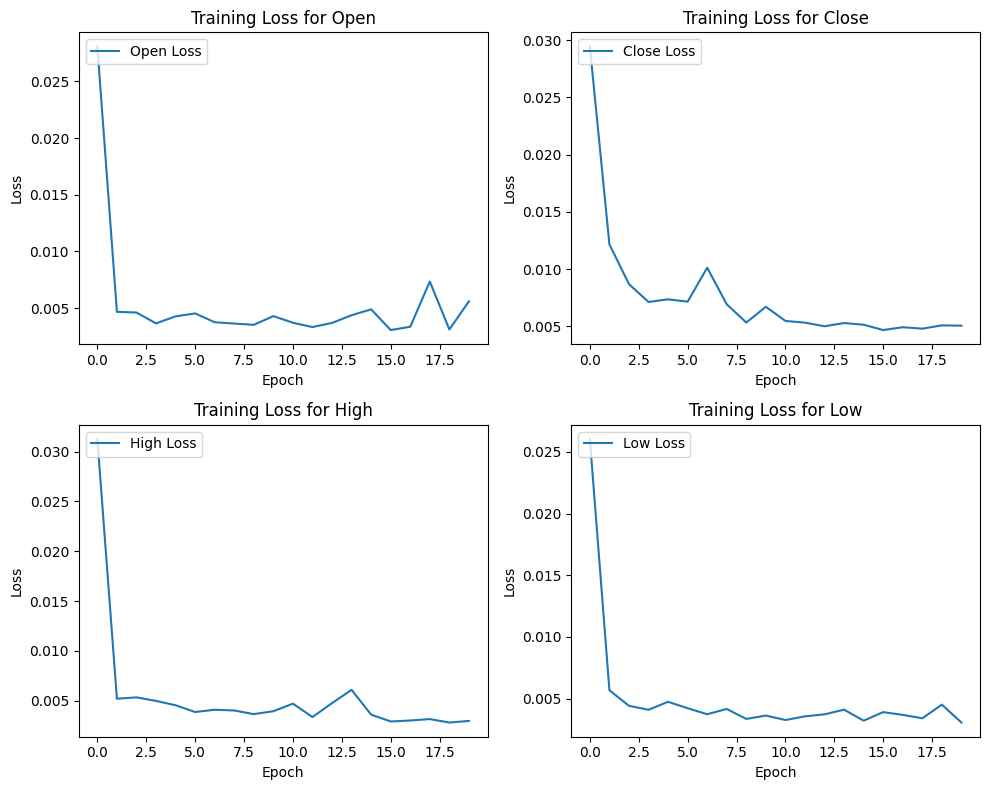

In [156]:
# plt.plot(hists.history['loss'])
# plt.title('Training model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()

# plt.plot(hists["Open"].history['loss'])
# plt.title('Training model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()

# Set up a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten to iterate over axes easily

# Plot each model's loss in a subplot
for i, (model_name, history) in enumerate(hists.items()):
    ax = axes[i]
    ax.plot(history.history['loss'], label=f'{model_name} Loss')
    ax.set_title(f'Training Loss for {model_name}')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper left')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In this section of the code, we are going to use the trained model to predict the outputs.

In [165]:
# testData = pd.read_csv('Google_test_data.csv')
# testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
# testData = testData.dropna()
# testData = testData.iloc[:,4:5]
# y_test = testData.iloc[60:,0:].values 
# #input array for the model
# inputClosing = testData.iloc[:,0:].values 
# inputClosing_scaled = sc.transform(inputClosing)
# inputClosing_scaled.shape
# X_test = []
# length = len(testData)
# timestep = 60
# for i in range(timestep,length):  
#     X_test.append(inputClosing_scaled[i-timestep:i,0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# X_test.shape

testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()

# Extract the relevant columns as NumPy arrays
testDataOpen = testData.iloc[:, 1:2].values
y_test_open = testDataOpen[60:,0:]
testDataHigh = testData.iloc[:, 2:3].values
y_test_high = testDataHigh[60:,0:]
testDataLow = testData.iloc[:, 3:4].values
y_test_low = testDataLow[60:,0:]
testDataClose = testData.iloc[:, 4:5].values
y_test_close = testDataClose[60:,0:]


# Function to preprocess the data for a given column
def preprocess_column(column_data, scaler, timestep=60):
    # Scale the data using the provided scaler
    column_scaled = scaler.transform(column_data)
    # Prepare the input array for the model
    X_column = []
    length = len(column_data)
    for i in range(timestep, length):
        X_column.append(column_scaled[i - timestep:i, 0])
    X_column = np.array(X_column)
    X_column = np.reshape(X_column, (X_column.shape[0], X_column.shape[1], 1))  # Reshape for LSTM
    return X_column

# Use the preprocessing function for each column
X_test_Open = preprocess_column(testDataOpen, sc)
X_test_High = preprocess_column(testDataHigh, sc)
X_test_Low = preprocess_column(testDataLow, sc)
X_test_Close = preprocess_column(testDataClose, sc)

# Check shapes of processed test data
print("Shapes of processed test data:")
print("Open:", X_test_Open.shape)
print("High:", X_test_High.shape)
print("Low:", X_test_Low.shape)
print("Close:", X_test_Close.shape)



Shapes of processed test data:
Open: (192, 60, 1)
High: (192, 60, 1)
Low: (192, 60, 1)
Close: (192, 60, 1)


The prediciting:

In [166]:
# y_pred = model.predict(X_test)
# y_pred

y_pred_open = model.predict(X_test_Open)
y_pred_close = model.predict(X_test_Close)
y_pred_low = model.predict(X_test_Low)
y_pred_high = model.predict(X_test_High)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Undo the scaling we did earlier.

In [167]:
# predicted_price = sc.inverse_transform(y_pred)

predicted_price_open = sc.inverse_transform(y_pred_open)
predicted_price_low = sc.inverse_transform(y_pred_low)
predicted_price_close = sc.inverse_transform(y_pred_close)
predicted_price_high = sc.inverse_transform(y_pred_high)

Plot the graphs.

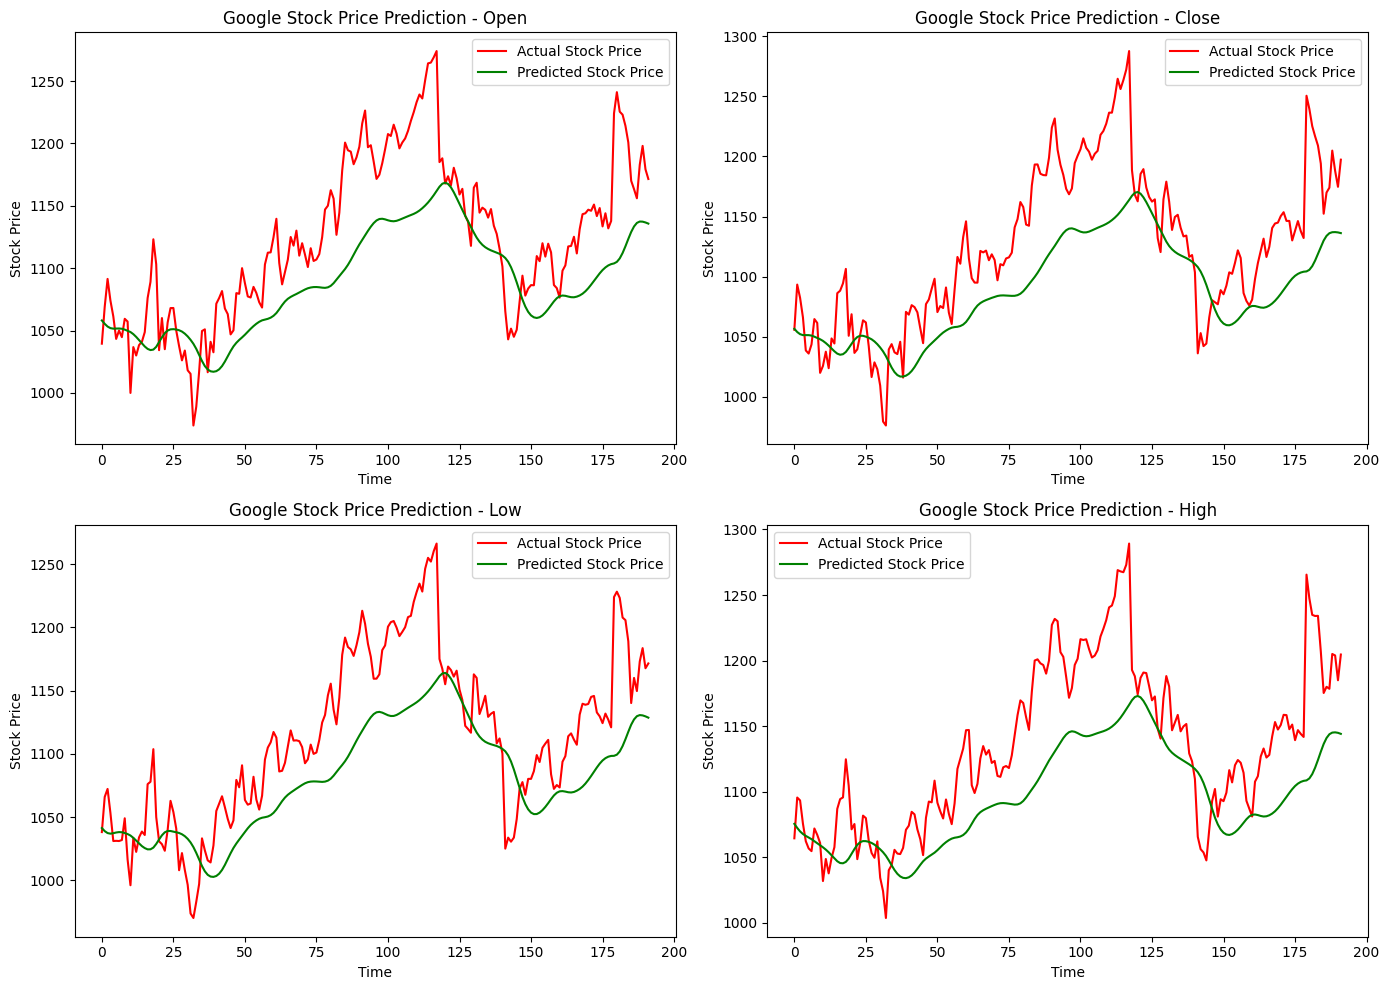

In [168]:
# plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
# plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
# plt.title('Google stock price prediction')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Open Prices
axes[0, 0].plot(y_test_open, color='red', label='Actual Stock Price')
axes[0, 0].plot(predicted_price_open, color='green', label='Predicted Stock Price')
axes[0, 0].set_title('Google Stock Price Prediction - Open')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('Stock Price')
axes[0, 0].legend()

# Plot for Close Prices
axes[0, 1].plot(y_test_close, color='red', label='Actual Stock Price')
axes[0, 1].plot(predicted_price_close, color='green', label='Predicted Stock Price')
axes[0, 1].set_title('Google Stock Price Prediction - Close')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('Stock Price')
axes[0, 1].legend()

# Plot for Low Prices
axes[1, 0].plot(y_test_low, color='red', label='Actual Stock Price')
axes[1, 0].plot(predicted_price_low, color='green', label='Predicted Stock Price')
axes[1, 0].set_title('Google Stock Price Prediction - Low')
axes[1, 0].set_xlabel('Time')
axes[1, 0].set_ylabel('Stock Price')
axes[1, 0].legend()

# Plot for High Prices
axes[1, 1].plot(y_test_high, color='red', label='Actual Stock Price')
axes[1, 1].plot(predicted_price_high, color='green', label='Predicted Stock Price')
axes[1, 1].set_title('Google Stock Price Prediction - High')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Stock Price')
axes[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

What can this tell us about the performance? Looking at the graphs doesn't show us anything glarling: all the features seem equally predictable.

Maybe we can make a function to get the mean squared error?

In [188]:
from sklearn.metrics import mean_squared_error

print("Open:")
print(mean_squared_error(y_test_open, predicted_price_open))

print("Low:")
print(mean_squared_error(y_test_low, predicted_price_low))

print("High:")
print(mean_squared_error(y_test_high, predicted_price_high))

print("Close:")
print(mean_squared_error(y_test_close, predicted_price_close))


Open:
2606.004275407172
Low:
2460.714179767263
High:
2802.143368176426
Close:
2696.936856470285


It appears Low is the easiest to predict.. why?

## Multi-Feature LSTMS:

So far we used a single feature to predict a 1d outcome, what if we use use more than one?

In this example, instead of using them individually, we will use them all in one model.

We will use Open, Close, High and Low, to predict the Close prices.

Let's make our training data set.

In [245]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()

trainData = data.iloc[:,1:5].values

trainData = sc.fit_transform(trainData)


In [246]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i]) 
    y_train.append(trainData[i])

X_train,y_train = np.array(X_train),np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(1089, 60, 4)
(1089, 4)


In [247]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],4)) #adding the batch_size axis
X_train.shape

(1089, 60, 4)

In [248]:
modelMulti, histMulti = create_and_train_model(X_train, y_train, features = 4)

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 - 8s - 231ms/step - loss: 0.0437
Epoch 2/20
35/35 - 5s - 130ms/step - loss: 0.0108
Epoch 3/20
35/35 - 5s - 131ms/step - loss: 0.0097
Epoch 4/20
35/35 - 5s - 135ms/step - loss: 0.0088
Epoch 5/20
35/35 - 5s - 144ms/step - loss: 0.0073
Epoch 6/20
35/35 - 5s - 137ms/step - loss: 0.0069
Epoch 7/20
35/35 - 5s - 139ms/step - loss: 0.0076
Epoch 8/20
35/35 - 5s - 135ms/step - loss: 0.0072
Epoch 9/20
35/35 - 5s - 138ms/step - loss: 0.0064
Epoch 10/20
35/35 - 5s - 141ms/step - loss: 0.0065
Epoch 11/20
35/35 - 5s - 138ms/step - loss: 0.0057
Epoch 12/20
35/35 - 5s - 137ms/step - loss: 0.0061
Epoch 13/20
35/35 - 5s - 139ms/step - loss: 0.0056
Epoch 14/20
35/35 - 6s - 164ms/step - loss: 0.0059
Epoch 15/20
35/35 - 8s - 232ms/step - loss: 0.0061
Epoch 16/20
35/35 - 5s - 143ms/step - loss: 0.0054
Epoch 17/20
35/35 - 5s - 148ms/step - loss: 0.0055
Epoch 18/20
35/35 - 6s - 169ms/step - loss: 0.0053
Epoch 19/20
35/35 - 7s - 210ms/step - loss: 0.0047
Epoch 20/20
35/35 - 6s - 160ms/step - loss: 0.0052


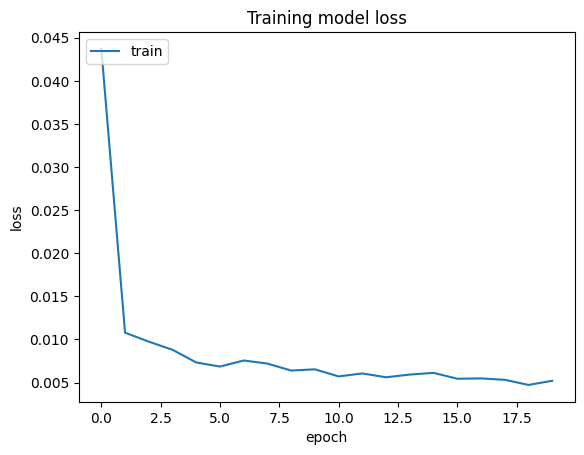

In [249]:
plt.plot(histMulti.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [253]:
# Load and preprocess the test data
testDataMulti = pd.read_csv('Google_test_data.csv')
testDataMulti["Close"] = pd.to_numeric(testDataMulti.Close, errors='coerce')
testDataMulti = testDataMulti.dropna()

# Extract the relevant columns (Open, High, Low, Close)
testDataMulti = testDataMulti.iloc[:, 1:5]  # Assuming these are the columns for Open, High, Low, Close

# Prepare the y_test array (actual values to compare predictions with)
y_test_multi = testDataMulti.iloc[60:, :].values  # Actual values from the 60th row onwards

# Input array for the model
inputMulti = testDataMulti.values  # Full dataset as NumPy array
inputMulti_scaled = sc.transform(inputMulti)  # Scale the data
inputMulti_scaled.shape  # Shape: (length, 4)

# Prepare the X_test array
X_test = []
length = len(testDataMulti)
timestep = 60

for i in range(timestep, length):
    # Append the last 60 timesteps of all features for each row
    X_test.append(inputMulti_scaled[i-timestep:i, :])  # Shape: (60, 4)

# Convert to NumPy array and reshape
X_test = np.array(X_test)  # Convert to a NumPy array
print("X_test shape:", X_test.shape)  # Expected shape: (192, 60, 4)
print("y_test_multi shape:", y_test_multi.shape)  # Expected shape: (192, 4)

X_test shape: (192, 60, 4)
y_test_multi shape: (192, 4)


In [254]:
y_pred_multi = modelMulti.predict(X_test)
y_pred_multi.shape

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


(192, 4)

In [255]:
predicted_price_multi = sc.inverse_transform(y_pred_multi)

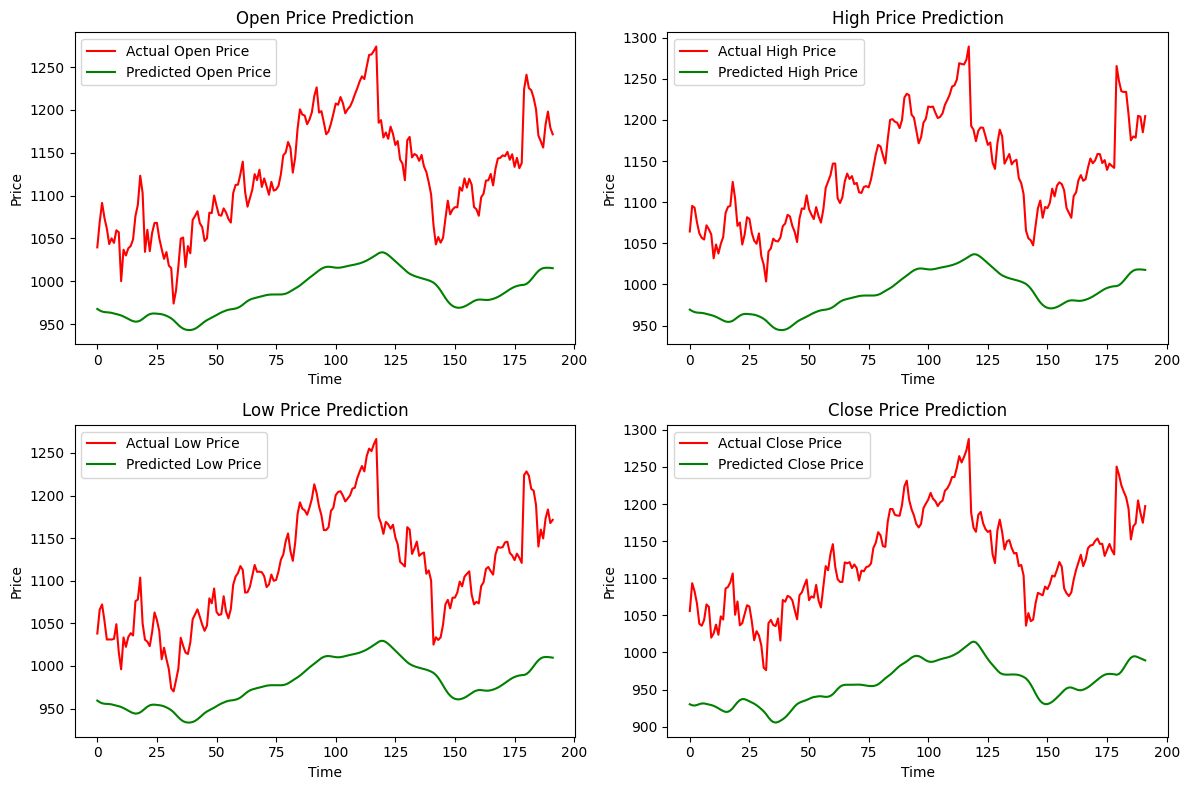

In [256]:
# Define feature names for better labeling
features = ['Open', 'High', 'Low', 'Close']

# Create subplots (2 rows x 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes array for easier indexing
axs = axs.ravel()

# Plot each feature
for i, feature in enumerate(features):
    axs[i].plot(y_test_multi[:, i], color='red', label=f'Actual {feature} Price')
    axs[i].plot(predicted_price_multi[:, i], color='green', label=f'Predicted {feature} Price')
    axs[i].set_title(f'{feature} Price Prediction')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Price')
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()